![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---
### Equipo:

- Nombre de alumno 1: Isabel Marx
- Nombre de alumno 2: Canela Orellana

### **Link de repositorio de GitHub:** https://github.com/CanelaOrellana/MDS7202-IsabelMarx-y-CanelaOrellana

---

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Además, se adjunta junto con los datos del proyecto un archivo llamado `requirements.txt` que contiene todas las bibliotecas y versiones necesarias para el desarrollo del proyecto. Se le recomienda levantar un ambiente de `conda` para instalar estas librerías y así evitar cualquier problema con las versiones.


---

## Secciones Requeridas en el Informe

La siguiente lista detalla las secciones que debe contener su notebook para resolver el proyecto. 
Es importante que al momento de desarrollar cada una de las secciones, estas sean escritas en un formato tipo **informe**, donde describan detalladamente cada uno de los puntos realizados.


### 1. Introducción [0.5 puntos]

_Esta sección es literalmente una muy breve introducción con todo lo necesario para entender que hicieron en su proyecto._

[-] Describir brevemente el problema planteado (¿Qué se intenta predecir?)


[-] Describir brevemente los datos de entrada que les provee el problema.


[-] Describir las métricas que utilizarán para evaluar los modelos generados. Eligan **una métrica** adecuada para el desarrollo del proyecto **según la tarea que deben resolver y la institución a la cuál será su contraparte** y luego justifiquen su elección. Considerando que los datos presentan desbalanceo y que el uso de la métrica 'accuracy' sería incorrecto, enfoquen su elección en una de las métricas precision, recall o f1-score y en la clase que será evaluada.
Se plantea utilizar la métrica `f1-score` ya que nos interesa la combinación de un buen `recall`, que nos permitirá detectar un mayor porcentaje de los clientes riesgosos y `precision`, ya que tampoco se quiere identificar clientes de bajo riesgo como riesgosos, dado que esto les quitaría beneficios que sí les corresponden y por ende podría provocar que decidan cambiar de banco. 


[-] [Escribir al final] Describir brevemente el modelo que usaron para resolver el problema (incluyendo las transformaciones intermedias de datos).


[-] [Escribir al final] Indicar si lograron resolver el problema a través de su modelo. Indiquen además si creen que los resultados de su mejor modelo son aceptables y como les fue con respecto al resto de los equipos.

### 2. Carga de datos Análisis Exploratorio de Datos [Sin puntaje]

_La idea de esta sección es que cargen y exploren el dataset para así obtener una idea de como son los datos y como se relacionan con el problema._

Cargue los datos y realice un análisis exploratorio de datos para investigar patrones, tendencias y relaciones en un conjunto de datos. Se adjuntan diversos scripts para abodar rápidamente este punto. La descripción de las columnas las pueden encontrar en el siguiente [enlace](https://www.kaggle.com/datasets/parisrohan/credit-score-classification).

**NO deben escribir nada**, solo ejecutar el código y encontrar los patrones con los cuales se basaran para generar el modelo.

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

#Clasificadores
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb


# Metricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
df = pd.read_parquet('dataset.pq')

df.head()

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


### 3. Preparación de Datos [0.5 puntos]

_Esta sección consiste en generar los distintos pasos para preparar sus datos con el fin de luego poder crear su modelo._

#### 3.1 Preprocesamiento con `ColumnTransformer`

✅ Convierta las columnas mal leidas a sus tipos correspondientes (float, str, etc...)  

✅ Genere un `ColumnTransformer` que:  
  - Preprocese datos categóricos y ordinales.
  - Escale/estandarice datos numéricos.
  - Uitlice `.set_output(transform="pandas")` sobre su `ColumnTransformer` para setear el formato de salida a de las transformaciones a pandas.

✅ Luego, pruebe las transformaciones utilizando `fit_transform`.

✅ Posteriormente, ejecute un Holdout que le permita más adelante evaluar los modelos.

In [3]:
# quantiles age
q1 = df['age'].quantile(.01)
q3 = df['age'].quantile(.982)
mask = df['age'].between(q1, q3, inclusive='both')
#df edad filtrada
df = df[mask]

In [4]:
# quantiles num_bank_accounts
q1 = df['num_bank_accounts'].quantile(.01)
q3 = df['num_bank_accounts'].quantile(.982)
mask = df['num_bank_accounts'].between(q1, q3, inclusive='both')
#df num_bank_accounts filtrada
df = df[mask]

In [5]:
# quantiles num_credit_card
q1 = df['num_credit_card'].quantile(.01)
q3 = df['num_credit_card'].quantile(.982)
mask = df['num_credit_card'].between(q1, q3, inclusive='both')
#df num_credit_card filtrada
df = df[mask]

In [6]:
# quantiles num_of_loan
q3 = df['num_of_loan'].quantile(.982)
mask = df['num_of_loan'].between(0, q3, inclusive='both')
#df num_of_loan filtrada
df = df[mask]

In [7]:
# quantiles num_of_delayed_payment
q3 = df['num_of_delayed_payment'].quantile(.982)
mask = df['num_of_delayed_payment'].between(0, q3, inclusive='both')
#df num_of_delayed_payment filtrada
df = df[mask]

In [8]:
mask = df['payment_behaviour']!='!@9#%8'
df = df[mask]

Se tienen características que
- representan números enteros
- representan números reales
- representan variables categóricas

Cabe mencionar que si bien las variables ```age```, ```delay_from_due_date```, ```num_bank_accounts```, ```num_credit_card```, ```interest_rate``` son enteras, toman muchos valores diferentes (+150) por lo que se les realizarán transformaciones numéricas como a los flotantes y no se les tratará como categorías. 

In [9]:
from sklearn.preprocessing import OrdinalEncoder

categories_order = [['Low_spent_Small_value_payments',
                    'High_spent_Small_value_payments',
                    'Low_spent_Medium_value_payments',
                    'High_spent_Medium_value_payments',
                    'Low_spent_Large_value_payments', 
                    'High_spent_Large_value_payments']]

enc = OrdinalEncoder(categories=categories_order)

variables_ordinal = df[['payment_behaviour']]

#Se entrena el codificador
ordinales = enc.fit_transform(variables_ordinal.dropna())
#pd.DataFrame(ordinales, columns = ['payment_behaviour'])
df['ord_payment_behaviour'] = ordinales
df.head()

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,ord_payment_behaviour
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0,3.0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0,0.0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0,1.0
6,CUS_0x284a,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,0,...,352.16,29.187913,31.0,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,0,2.0
7,CUS_0x5407,30.0,Media_Manager,34081.38,2611.115000,8,7,15,3.0,30,...,1704.18,33.823488,15.0,Yes,70.478333,29.326364,High_spent_Medium_value_payments,411.306804,1,3.0


In [10]:
v_flotantes = ['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance' ]
v_enteras = ['credit_score']
v_categoricas = ['occupation', 'payment_of_min_amount']
v_ordinales = ['ord_payment_behaviour']

In [11]:
#Se crea el Column Transformer

ct = ColumnTransformer(
    transformers=[
        ('MinMax', MinMaxScaler(),v_flotantes),
        ('OneHot', OneHotEncoder(drop='first', sparse_output = False) , v_categoricas),
        ('Borrar', 'drop', ['payment_behaviour', 'customer_id'])],
        remainder="passthrough",
        sparse_threshold=0
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('MinMax', MinMaxScaler(),
                                 ['age', 'annual_income',
                                  'monthly_inhand_salary', 'num_bank_accounts',
                                  'num_credit_card', 'interest_rate',
                                  'num_of_loan', 'delay_from_due_date',
                                  'num_of_delayed_payment',
                                  'changed_credit_limit',
                                  'num_credit_inquiries', 'outstanding_debt',
                                  'credit_utilization_ratio',
                                  'credit_history_age', 'total_emi_per_month',
                                  'amount_invested_monthly',
                                  'monthly_balance']),
                                ('OneHot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['occupation', 'payment_of_min_amount']),
                                ('Borrar', 'drop',
                                 ['payment_behaviour', 'customer_id'])])

In [12]:
df_parte3 = ct.fit_transform(df)
df_parte3

,MinMax__age,MinMax__annual_income,MinMax__monthly_inhand_salary,MinMax__num_bank_accounts,MinMax__num_credit_card,MinMax__interest_rate,MinMax__num_of_loan,MinMax__delay_from_due_date,MinMax__num_of_delayed_payment,MinMax__changed_credit_limit,...,OneHot__occupation_Media_Manager,OneHot__occupation_Musician,OneHot__occupation_Scientist,OneHot__occupation_Teacher,OneHot__occupation_Writer,OneHot__occupation________,OneHot__payment_of_min_amount_No,OneHot__payment_of_min_amount_Yes,remainder__credit_score,remainder__ord_payment_behaviour
0,0.214286,0.000508,0.101127,0.3,0.009036,0.000346,0.444444,0.111111,0.24,0.424597,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,3.0
1,0.333333,0.001168,0.182628,0.2,0.009036,0.000864,0.111111,0.111111,0.16,0.281845,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0.0
2,0.476190,0.005714,0.797286,0.1,0.012048,0.001209,0.333333,0.180556,0.24,0.322840,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
6,0.476190,0.005217,0.681868,0.0,0.000000,0.001209,0.222222,0.069444,0.08,0.377501,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2.0
7,0.380952,0.001136,0.153950,0.8,0.018072,0.002419,0.333333,0.486111,0.56,0.567594,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12493,0.452381,0.002188,0.308316,0.3,0.015060,0.000864,0.111111,0.180556,0.24,0.312592,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4.0
12494,0.166667,0.001314,0.187241,0.4,0.009036,0.000346,0.444444,0.152778,0.28,0.188385,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2.0
12496,0.738095,0.000406,NaN,0.1,0.000000,0.000691,0.444444,0.083333,0.00,0.288433,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4.0
12497,0.857143,0.001267,0.186593,0.1,0.009036,0.000691,0.333333,0.166667,0.36,0.280869,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,3.0


pd: se intentó utilizar `.set_output(transform="pandas")` como se indicaba, pero no se logró que quedara de la forma deseada

#### 3.3 Datos nulos.

Como habrá visto, existe la posibilidad de que algunos datos sean nulos. En esta sección se le solicita justificar, previo a comenzar el modelado, decidir si conservar e imputar los datos nulos o eliminar las filas. 

Note que la decisión que tomen aquí puede afectar fuertemente el rendimiento de los modelos. 
Y como siempre, más adelante tienen el espacio para experimentar con ambas opciones.


In [13]:
df.isna().sum()

customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1433
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment         0
changed_credit_limit         195
num_credit_inquiries         186
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age           839
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      427
payment_behaviour              0
monthly_balance              273
credit_score                   0
ord_payment_behaviour          0
dtype: int64

In [14]:
df.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score,ord_payment_behaviour
count,9478.000000,9.478000e+03,8045.000000,9478.000000,9478.000000,9478.000000,9478.000000,9478.000000,9478.000000,9283.000000,9292.000000,9478.000000,9478.000000,8639.000000,9478.000000,9051.000000,9.205000e+03,9478.000000,9478.000000
mean,33.600338,1.611253e+05,4195.330316,5.371597,6.446930,73.508441,3.516565,21.016459,13.327601,10.457766,25.551442,1418.114577,32.334785,18.230235,1512.350173,637.895174,-3.621220e+22,0.287191,2.187592
std,10.737224,1.298095e+06,3201.320042,2.581483,13.801105,472.671902,2.428787,14.831954,6.118486,6.799325,176.683318,1145.678124,5.149822,8.292669,8570.578570,2043.800775,3.474296e+24,0.452476,1.788266
min,14.000000,7.005930e+03,319.556250,0.000000,1.000000,1.000000,0.000000,-5.000000,0.000000,-6.130000,0.000000,0.230000,20.244130,0.000000,0.000000,0.000000,-3.333333e+26,0.000000,0.000000
25%,25.000000,1.938845e+04,1617.173333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.395000,4.000000,565.375000,28.070247,12.000000,31.045634,73.864305,2.698485e+02,0.000000,0.000000
50%,33.000000,3.745832e+04,3077.808333,5.000000,5.000000,14.000000,3.000000,18.000000,14.000000,9.470000,6.000000,1160.245000,32.389067,18.000000,71.871247,134.658894,3.388678e+02,0.000000,2.000000
75%,42.000000,7.333947e+04,6009.223333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.040000,10.000000,1939.932500,36.605667,25.000000,169.650022,263.812440,4.710436e+02,1.000000,4.000000
max,56.000000,2.383470e+07,15204.633333,10.000000,333.000000,5789.000000,9.000000,67.000000,25.000000,34.850000,2554.000000,4997.100000,48.199824,33.000000,81935.000000,10000.000000,1.463792e+03,1.000000,5.000000


In [15]:
df.dropna().describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score,ord_payment_behaviour
count,6535.000000,6.535000e+03,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6.535000e+03,6535.000000,6535.000000
mean,33.464269,1.654028e+05,4149.091625,5.373221,6.551798,74.782096,3.493191,21.009640,13.355777,10.419983,24.544147,1417.923155,32.367445,18.236572,1576.040979,623.696966,-5.100740e+22,0.288600,2.203673
std,10.756248,1.352827e+06,3192.241340,2.589172,14.740808,473.962556,2.430971,14.822511,6.136043,6.839138,170.237494,1150.815801,5.098896,8.292113,8766.229493,2028.855965,4.123405e+24,0.453146,1.782045
min,14.000000,7.019435e+03,319.556250,0.000000,1.000000,1.000000,0.000000,-5.000000,0.000000,-6.130000,0.000000,0.340000,21.502217,0.000000,0.000000,0.000000,-3.333333e+26,0.000000,0.000000
25%,25.000000,1.920949e+04,1606.804782,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.375000,4.000000,565.310000,28.168383,12.000000,30.792469,73.362564,2.699952e+02,0.000000,0.000000
50%,33.000000,3.675332e+04,3037.986667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.380000,6.000000,1160.070000,32.414174,18.000000,70.992017,132.735517,3.383027e+02,0.000000,2.000000
75%,42.000000,7.268721e+04,5949.440631,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.995000,10.000000,1920.010000,36.599482,25.000000,164.285008,252.989769,4.715264e+02,1.000000,4.000000
max,56.000000,2.383470e+07,15167.180000,10.000000,333.000000,5789.000000,9.000000,67.000000,25.000000,34.850000,2457.000000,4997.100000,48.199824,33.000000,81194.000000,10000.000000,1.463792e+03,1.000000,5.000000


Dado que los promedios y desviación estándar de los datos al borrar los nulos se mantienen, junto con que son variables dificiles de inputar, puesto que ... se decide que lo mejor en este caso sería borrar los nulos.

In [16]:
#Se borran los datos nulos
df.dropna(inplace=True)

#### 3.2 Holdout 

✅ Ejecute `train_test_split` para generar un conjunto de entrenamiento y de prueba. 

Si bien tienen la libertad de generar conjuntos de validación para robustecer sus resultados, este no es requisito obligatorio y no se le asignará puntaje por esto (esto debido a que grid-search ocupa internamente cross validation).

In [17]:
y = df['credit_score']
X = df.drop(columns=['credit_score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

#### 3.4 Feature Engineering [Bonus - 0.5 puntos]

En esta sección, se espera que apliquen su conocimiento y creatividad para identificar y construir características que brinden una mejor orientación a su modelo para identificar los casos deseados. Para motivar la construcción de nuevas características, se recomienda explorar las siguientes posibilidades:

- Generar ratios que relacionen variables categóricas con numéricas. Estos ratios permiten capturar relaciones proporcionales o comparativas entre diferentes categorías y valores numéricos.
- Combinación de rankings entre variables numéricas y categóricas.
- Discretización de variables numéricas a categóricas.
- Etc...

**Importantes**: Al explorar estas posibilidades no se limiten solo a estas propuestas, pueden aplicar otras técnicas de feature engineering pertinentes para mejorar la capacidad de su modelo para comprender y aprovechar los patrones presentes en los datos.

Se decide utilizar **selección de características** mediante `SelectKBest` como técnica de feature engineering. 

### 4. Baseline [1.5 puntos]

_En esta sección deben crear los modelos más básicos posibles que resuelvan el problema dado. La idea de estos modelos son usarlos como comparación para que en el siguiente paso lo puedan mejorar._

Implemente, entrene y evalúe varias `Pipeline` enfocadas en resolver el problema de clasificación en donde la diferencia entre estas sea el modelo utilizado.


Para esto, cada Pipeline debe:

- ✅ Tener el `ColumnTransformer` implementado en la sección anterior como primer paso.
- ✅ Implementar un imputador en caso de haber decidido conservar los datos nulos.
- ✅ Implementar un clasificador en la salida (ver siguiente lista).
  
Y además, 
- ✅ Ser evaluado de forma general imprimiendo un `classification_report`.
- ✅ Calcular y guardar la métrica seleccionada en el punto 1.2 en un arreglo de métricas (guardar nombre y valor de la métrica).

Lo anterior debe ser implementado utilizando los siguientes modelos:

- `Dummy` con estrategia estratificada.
- `LogisticRegression`.
- `KNeighborsClassifier`.
- `DecisionTreeClassifier`
- `SVC`
- `RandomForestClassifier` 
- `LightGBMClassifier` (del paquete `lightgbm`)
- `XGBClassifier` (del paquete `xgboost`).

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

#Clasificadores
Dummy = DummyClassifier(strategy='stratified',random_state=17)
L_Reg = LogisticRegression(random_state=17)
KNCla = KNeighborsClassifier()
DTreC = DecisionTreeClassifier(random_state=17)
SVCla = SVC(random_state=17)
RFCla = RandomForestClassifier(random_state=17)
LGBMC = lgb.LGBMClassifier(random_state=17)
XGBCl = xgb.XGBClassifier(random_state=17)


#Se crean pipelines para cada clasificador
dummy_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", Dummy)])

LogRegression_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", L_Reg)])

KNeighbors_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", KNCla)])

DecisionTree_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", DTreC)])

SVC_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", SVCla)])

RandomForest_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", RFCla)])

LightGBM_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", LGBMC)])

XGBoost_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", XGBCl)])

In [19]:
#Se define una función para reportar los resultados
def reporte(y_pred, y_real, clasificador, t):
    M_Confusion = confusion_matrix(y_real, y_pred, normalize='true')

    #Se imprime clasification_report
    print(classification_report(y_real, y_pred))
    f1 = f1_score(y_real, y_pred, average='weighted')

    fig = px.imshow(M_Confusion, text_auto=True,color_continuous_scale='BuPu')
    fig.show()

    return [clasificador, f1, t]

In [20]:
import time

In [21]:
#Entrenamientos
ti_dummy = time.time()
dummy_pipe.fit(X_train,y_train)
t_dummy = time.time()-ti_dummy

ti_l_reg = time.time()
LogRegression_pipe.fit(X_train,y_train)
t_l_reg = time.time()-ti_l_reg

ti_kncla = time.time()
KNeighbors_pipe.fit(X_train,y_train)
t_kncla = time.time()-ti_kncla

ti_dtrec = time.time()
DecisionTree_pipe.fit(X_train,y_train)
t_dtrec = time.time()-ti_dtrec

ti_svcla = time.time()
SVC_pipe.fit(X_train,y_train)
t_svcla = time.time()-ti_svcla

ti_rfcla = time.time()
RandomForest_pipe.fit(X_train,y_train)
t_rfcla = time.time()-ti_rfcla

ti_lgbmc = time.time()
LightGBM_pipe.fit(X_train,y_train)
t_lgbmc = time.time()-ti_lgbmc

ti_xgbcl = time.time()
XGBoost_pipe.fit(X_train,y_train)
t_xgbcl = time.time()-ti_xgbcl

#Predicciones
y_dummy = dummy_pipe.predict(X_test)
y_L_reg = LogRegression_pipe.predict(X_test)
y_KNCla = KNeighbors_pipe.predict(X_test)
y_DtreC = DecisionTree_pipe.predict(X_test)
y_SVCla = SVC_pipe.predict(X_test)
y_RFCla = RandomForest_pipe.predict(X_test)
y_LGBMC = LightGBM_pipe.predict(X_test)
y_XGBCl = XGBoost_pipe.predict(X_test)

#Reportes
print('\n::::::::::::::::::::::Dummy Classifier::::::::::::::::::::::')
m_dummy = reporte(y_dummy, y_test, 'Dummy Classifier', t_dummy)
print('\n::::::::::::::::::::::Logistic Regrssion::::::::::::::::::::::')
m_log_r = reporte(y_L_reg, y_test, 'Logistic Regression', t_l_reg)
print('\n::::::::::::::::::::::KNeighbors Classifier::::::::::::::::::::::')
m_kncla = reporte(y_KNCla, y_test, 'KNeighbors Classifier', t_kncla)
print('\n::::::::::::::::::::::Decision Tree Classifier::::::::::::::::::::::')
m_dtrec = reporte(y_DtreC, y_test, 'Decision Tree Classifier', t_dtrec)
print('\n::::::::::::::::::::::Support Vector Classifier::::::::::::::::::::::')
m_svcla = reporte(y_SVCla, y_test, 'SVC', t_svcla)
print('\n::::::::::::::::::::::Random Forest Classifier::::::::::::::::::::::')
m_rfcla = reporte(y_RFCla, y_test, 'Random Forest Classifier', t_rfcla)
print('\n::::::::::::::::::::::Light GBM::::::::::::::::::::::')
m_lgbmc = reporte(y_LGBMC, y_test, 'Light GBM', t_lgbmc)
print('\n::::::::::::::::::::::XGBoost Classifier::::::::::::::::::::::')
m_xgbcl = reporte(y_XGBCl, y_test, 'XGBoost', t_xgbcl)

[LightGBM] [Info] Number of positive: 1262, number of negative: 3116
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288259 -> initscore=-0.903852
[LightGBM] [Info] Start training from score -0.903852

::::::::::::::::::::::Dummy Classifier::::::::::::::::::::::
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1533
           1       0.29      0.28      0.28       624

    accuracy                           0.59      2157
   macro avg       0.50      0.50      0.50      2157
weighted avg       0.59      0.59      0.59      2157




::::::::::::::::::::::Logistic Regrssion::::::::::::::::::::::
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1533
           1       0.55      0.30      0.39       624

    accuracy                           0.73      2157
   macro avg       0.65      0.60      0.61      2157
weighted avg       0.70      0.73      0.70      2157




::::::::::::::::::::::KNeighbors Classifier::::::::::::::::::::::
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1533
           1       0.55      0.40      0.46       624

    accuracy                           0.73      2157
   macro avg       0.67      0.63      0.64      2157
weighted avg       0.71      0.73      0.72      2157




::::::::::::::::::::::Decision Tree Classifier::::::::::::::::::::::
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1533
           1       0.45      0.46      0.45       624

    accuracy                           0.68      2157
   macro avg       0.61      0.61      0.61      2157
weighted avg       0.68      0.68      0.68      2157




::::::::::::::::::::::Support Vector Classifier::::::::::::::::::::::
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1533
           1       0.58      0.24      0.34       624

    accuracy                           0.73      2157
   macro avg       0.66      0.59      0.59      2157
weighted avg       0.70      0.73      0.69      2157




::::::::::::::::::::::Random Forest Classifier::::::::::::::::::::::
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1533
           1       0.63      0.47      0.54       624

    accuracy                           0.77      2157
   macro avg       0.72      0.68      0.69      2157
weighted avg       0.75      0.77      0.76      2157




::::::::::::::::::::::Light GBM::::::::::::::::::::::
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1533
           1       0.61      0.47      0.53       624

    accuracy                           0.76      2157
   macro avg       0.71      0.68      0.69      2157
weighted avg       0.75      0.76      0.75      2157




::::::::::::::::::::::XGBoost Classifier::::::::::::::::::::::
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1533
           1       0.57      0.45      0.51       624

    accuracy                           0.74      2157
   macro avg       0.68      0.66      0.67      2157
weighted avg       0.73      0.74      0.73      2157



✅ Luego, transformando el diccionario de las métricas a un pandas `DataFrame`, ordene según los valores de su métrica de mayor a menor y responda.

**Nota**: Puede utilizar un for más una lista con las clases de los modelos mencionados para simplificar el proceso anterior.

In [22]:
f1 = [m_dummy, m_log_r, m_kncla, m_dtrec, m_svcla, m_rfcla, m_lgbmc, m_xgbcl]
df_f1 = pd.DataFrame(f1, columns=['Clasificador', 'f1 score', 't entrenamiento'])

df_f1.sort_values(by=['f1 score'], ascending=False)

,Clasificador,f1 score,t entrenamiento
5,Random Forest Classifier,0.755530,2.305698
6,Light GBM,0.751510,0.416196
7,XGBoost,0.734236,1.393732
2,KNeighbors Classifier,0.717524,0.075797
1,Logistic Regression,0.698067,0.266044
4,SVC,0.688952,1.910080
3,Decision Tree Classifier,0.680661,0.126991
0,Dummy Classifier,0.589663,0.100797


- ¿Hay algún clasificador entrenado mejor que el azar (`Dummy`)?

Sí, todos los clasificadores entrenados resultaron obtener mejor `f1 score` que el `Dummy`, esto es esperable, dado que el DummyClassifier entrega sus resultados basados en el azar, mientras que los otros clasificadores utilizado tienen algoritmos más complejos

- ¿Cuál es el mejor clasificador entrenado?

El mejor clasificador entrenado según la métrica `f1 score` fue `Random Forest Classifier`, pero bastante cerca se encuentra también `Light GBM`

- ¿Por qué el mejor clasificador es mejor que los otros?
Se define como el mejor clasificador, ya que es el que posee mejor `f1 score` que es la métrica más importante en este problema, ya que como se explicó antes, se quiere obtener buenos valores tanto de `precision` como de `recall`, además de no ser tan sensible al desbalance como otras métricas. Ambos métodos seleccionados como los mejores, corresponden a métodos de ensamblaje, es decir, se entrenan varios clasificadores y se encuentra el mejor, en el caso de `Light GBM` (tipo `Boosting`), este va mejorando en cada iteración, en cambio `Random Forest Classifier` (tipo `Bagging`) entrena árboles independientes y luego simplemente selecciona el mejor. Estos métodos permiten revisar varios casos de una sola vez, logrando mejores resultados de manera más rápida. 

- Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).

Respecto a los tiempos de entrenamientos, los mejores clasificadores tienen tiempos un poco altos, pero no gigantéscos: 
    - 1.902050 [seg] para LightGBM
    - 3.740281 [seg] para Random Forest

Por lo que se considera adecuado utilizarlos para optimizarlos mediante una grilla. Por otro lado, el método siguiente resulta ser `XGBoost` que es del mismo tipo, pero si presenta un tiempo de entrenamiento mucho mayor, por lo que no se considera conveniente y si seguimos avanzando en la lista, los siguientes clasificadores, apesar de ser más rápidos, no obtuvieron tan buenas métricas de `f1 score` con sus valores por defecto.

### 5. Optimización del Modelo [1.5 puntos]

_En esta sección deben mejorar del modelo de clasificación al variar los algoritmos/hiperparámetros que están ocupando._

- ✅ Instanciar dos nuevas `Pipeline`, similares a la anterior, pero ahora enfocada en buscar el mejor modelo. Para esto, la pipelines debe utilizar el primer y segundo mejor modelo encontrado en el paso anterior.
- ✅ Usar **`GridSearchCV`** o **`HalvingGridSearchCV`** para tunear hipermarámetros. La primera demorará más que la segunda pero les traerá potencialmente mejores resultados.
- **Importante**: Recuerden setear la búsqueda para optimizar la métrica seleccionada en los puntos anteriores.

Algunas ideas para mejorar el rendimiento de sus modelos:

- ✅ Agregar técnicas de seleccion de atributos/características. El parámetro de cuántas características se seleccionan debe ser parametrizable y configurado por el optimizador de hiperparámetros.
- ❎ Variar el imputador de datos en caso de usarlo.

In [23]:
from sklearn.feature_selection import SelectPercentile, f_classif

#Creación de pipelines
RF_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", RandomForestClassifier(random_state=17))])

LGBM_pipe = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest()),
        ("clf", lgb.LGBMClassifier(random_state=17))])

In [24]:
#HalvingGridSearch
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

#Se crean las grillas para buscar los mejores hiperparámetros
param_grid_rf = [
    {   'Selection__k': [4, 8, 10, 15],
        'clf__criterion': ['gini', 'entropy', 'log_loss'],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_features': ['sqrt', 'log2']}]

param_grid_lgbm = [
    {   'Selection__k': [4, 8, 10, 15],
        'clf__max_depth': [-1, 100, 50],
        'clf__learning_rate': [0.1, 0.3, 0.02]}]


#Se crean los objetos GridSearch
hgs_rf = HalvingGridSearchCV(RF_pipe, param_grid_rf, n_jobs=-1, cv=3,verbose=10,random_state=17)
hgs_lg = HalvingGridSearchCV(LGBM_pipe, param_grid_lgbm, n_jobs=-1, cv=3,verbose=10,random_state=17)

In [25]:
#Se entrena la grilla rf
ti = time.time()
hgs_rf.fit(X_train,y_train)

print('Tiempo: ' + str(time.time() - ti))

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 162
max_resources_: 4378
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 162
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[CV 2/3; 1/72] START Selection__k=4, clf__criterion=gini, clf__max_features=sqrt, clf__n_estimators=100
[CV 3/3; 1/72] START Selection__k=4, clf__criterion=gini, clf__max_features=sqrt, clf__n_estimators=100
[CV 1/3; 1/72] START Selection__k=4, clf__criterion=gini, clf__max_features=sqrt, clf__n_estimators=100
[CV 1/3; 2/72] START Selection__k=4, clf__criterion=gini, clf__max_features=sqrt, clf__n_estimators=200
[CV 2/3; 1/72] END Selection__k=4, clf__criterion=gini, clf__max_features=sqrt, clf__n_estimators=100;, score=(train=1.000, test=0.660) total time=   1.0s
[CV 3/3; 1/72] END Selection__k=4, clf__criterion=gini, clf__max_features=sqrt, clf__n_estimators=100;, score=(train=1.000, test=0.642) total time=   0.9s
[CV 1/3; 1/72] END Selection__k=4, clf__criterion=gini, clf__max_features=sqrt, clf__n_estimators=100;, score=(train=1.000, test=0.852) total time=   0.9s
[CV 2/3; 2/72] START Selection__k=4, clf__criterion=gini, clf__max_features=sqrt, clf__n_estimators=200
[CV 3/3; 2/72] 

In [26]:
#Se entrena la grilla svc
ti = time.time()
hgs_lg.fit(X_train,y_train)

print('Tiempo: ' + str(time.time() - ti))

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 162
max_resources_: 4378
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 36
n_resources: 162
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START Selection__k=4, clf__learning_rate=0.1, clf__max_depth=-1..
[CV 2/3; 1/36] START Selection__k=4, clf__learning_rate=0.1, clf__max_depth=-1..
[CV 3/3; 1/36] START Selection__k=4, clf__learning_rate=0.1, clf__max_depth=-1..
[CV 1/3; 2/36] START Selection__k=4, clf__learning_rate=0.1, clf__max_depth=100.
[LightGBM] [Info] Number of positive: 32, number of negative: 76
[LightGBM] [Info] Number of positive: 31, number of negative: 76
[LightGBM] [Info] Number of positive: 33, number of negative: 75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 4
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.296296 -> initscore=-0.864997
[LightGBM] [Info] Start training from score -0.864997
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289720 -> initscore=-0.896746
[LightGBM] [Info] Start training from score -0.896746
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305556 -> initscor

In [27]:
#Se encuentran los mejores hiperparámetros de cada clasificador
print('Mejores hiperparámetros Random Forest: \n')
display(hgs_rf.best_params_)

print('Mejores hiperparámetros LightGBM: \n')
display(hgs_lg.best_params_)

Mejores hiperparámetros Random Forest: 



{'Selection__k': 15,
 'clf__criterion': 'log_loss',
 'clf__max_features': 'log2',
 'clf__n_estimators': 300}

Mejores hiperparámetros LightGBM: 



{'Selection__k': 15, 'clf__learning_rate': 0.02, 'clf__max_depth': 50}



#### Bonus

1. **Optuna** [0.5 extras]: Pueden probar también [`OptunaSearchCV`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html) de la librería [`Optuna`](https://optuna.org/), la cuál es bastante popular para buscar modelos de redes neuronales.
2. **Visualización con Optuna** [0.2 extras]: Explore la documentación de visualización de Optuna en el siguiente [link](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html) y realice un análisis sobre el proceso de optimización de hiperparámetros realizado.
3. **Imabalanced learn** [0.3 extras]: Al ser el problema desbalanceado, pueden probar técnicas para balancear automáticamente el dataset previo a ejecutar el modelo. Para esto, puede probar con los mecanismos implementados en la librería [Imbalanced learn](https://imbalanced-learn.org/). 
4. **Probar pycaret (AutoML) [0.3 extras]**.

Algunas notas interesantes sobre este proceso:

- No se les pide rendimientos cercanos al 100% de la métrica para concretar exitosamente el proyecto. Por otra parte, celebren cada progreso que obtengan.
- **Hacer grillas computables**: Si la grilla se va a demorar 1/3 la edad del universo en explorarse completamente, entonces achíquenla a algo que sepan que va a terminar.
- Aprovechen el procesamiento paralelo (con `njobs`) para acelerar la búsqueda. Sin embargo, si tienen problemas con la memoria RAM, reduzca la cantidad de jobs a algo que su computador/interprete web pueda procesar.
- La pipelines permiten cachear (guardar temporalmente) etapas cuyo cálculo es redudante, como por ejemplo el escalamiento y la imputación, acelerando así la computación. **Importante:** Para esto, cuando ejecuten `GridSearchCV`, agreguen a la pipeline en el parámetro `memory = "."`.

**Al final de este proceso, seleccione el mejor modelo encontrado, prediga el conjunto de prueba y reporte sus resultados.**

Los mejores modelos encontrados son:

- Random Forest con:  
    - 15 características
    - criterion: 'log_loss'
    - max_features: 'log2'
    - n_estimators: 300  

      
  
- LightGBM con:
    - 15 características
    - learning_rate: 0.02
    - max_depth: 50

In [28]:
#Random Forest
RF_pipe.set_params(Selection__k=15)
RF_pipe.set_params(clf__criterion='log_loss')
RF_pipe.set_params(clf__max_features='log2')
RF_pipe.set_params(clf__n_estimators=300)

ti_RF = time.time()
RF_pipe.fit(X_train,y_train)
t_RF = time.time()-ti_RF

y_RF = RF_pipe.predict(X_test)
f1_RFO = reporte(y_RF, y_test, 'Random Forest Optimizado', t_RF)
f1_RFO


              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1533
           1       0.64      0.47      0.54       624

    accuracy                           0.77      2157
   macro avg       0.72      0.68      0.69      2157
weighted avg       0.76      0.77      0.76      2157



['Random Forest Optimizado', 0.757122057349197, 10.748989820480347]

In [29]:
#LightGBM
LGBM_pipe.set_params(Selection__k=15)
LGBM_pipe.set_params(clf__learning_rate=0.02)
LGBM_pipe.set_params(clf__max_depth=50)

ti_LG = time.time()
LGBM_pipe.fit(X_train,y_train)
t_LG = time.time()-ti_LG

y_LG = LGBM_pipe.predict(X_test)
f1_LGO = reporte(y_LG, y_test, 'LightGBM Optimizado', t_LG)
f1_LGO

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1262, number of negative: 3116
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288259 -> initscore=-0.903852
[LightGBM] [Info] Start training from score -0.903852
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
              precision    recall  f1-score   suppor

['LightGBM Optimizado', 0.7678249924875353, 1.0643317699432373]

Comentar resultados,

### 6. Interpretabilidad [1.0 puntos]

_En esta sección, se espera que los estudiantes demuestren su capacidad para explicar cómo sus modelos toman decisiones utilizando los datos. Dentro del análisis de interpretabilidad propuesto para el modelo, deberán ser capaces de:_

- ✅ Proponer un método para analizar la interpretabilidad del modelo. Es crucial que puedan justificar por qué el método propuesto es el más adecuado y explicar los alcances que podría tener en su aplicación.  

Se propone el método agnóstico global de Permutation Feature Importance, este tipo de métodos nos permite describir en promedio el comportamiento del modelo que generamos, la ventaja de este método es que es sencillo y de fácil implementación. El alcance de este método, será comprender a nivel general el comportamiento del modelo.

pd: Estamos concientes de que un método agnóstico local nos ayudaría más a dar la interpretabilidad que quiere el señor Giturra para comprender porqué un cliente fue encontrado como riesgoso o no, pero lamentablemente no se logró utilizar las librerias que permiten hacer este tipo de métodos por un error de `Numba` que no pudo ser resuelto a tiempo. Por lo que en este caso particular, resultó más adecuado aplicar un método agnóstico global.

In [42]:
RF_pipe_aux = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ('Selection', SelectKBest(k=15))])

data_aux = RF_pipe_aux.fit_transform(X_test,y_test)
X = pd.DataFrame(data_aux, columns = RF_pipe_aux.get_feature_names_out())

In [43]:
from sklearn.inspection import permutation_importance

clf = LGBM_pipe.named_steps['clf']
#data = df
result = permutation_importance(clf, X, y_test, n_repeats=10, random_state=17)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

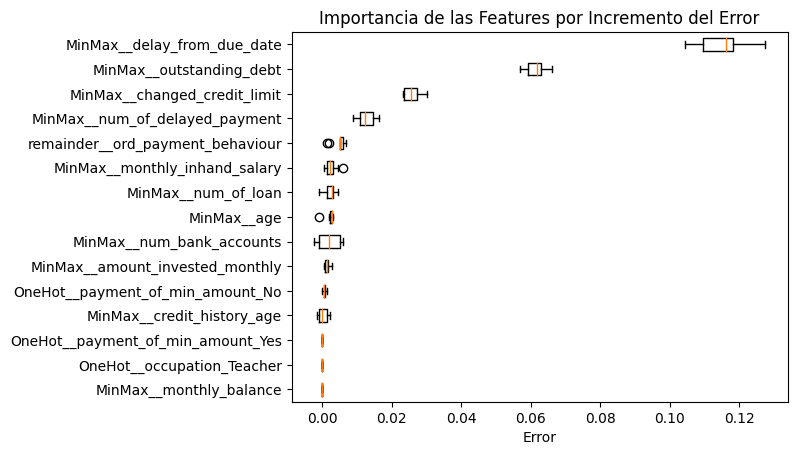

In [44]:
import matplotlib.pyplot as plt

perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

- Identificar las características más relevantes del modelo. ¿La distribución de importancia es coherente y equitativa entre todas las variables?

Las características más relevantes encontradas con este método son:
    - `delay_from_due_date`, es decir, el retraso en el pago desde la fecha de vencimiento del mismo.
    - `outstanding_debt`, es decir la deuda pendiente.
    - `changed_credit_limit`, que sería el límite de crédito modificado.
En principio, hace mucho sentido que estas características determinen el nivel de riesgo de un cliente, ya que hablan del comportamiento que tienen los clientes respecto de los créditos que piden, junto con decisiones que ya ha tomado el banco previamente al respecto.

- Analizar 10 observaciones aleatorias utilizando un método específico para verificar la coherencia de las interacciones entre las características.

- Explorar cómo se relacionan las variables utilizando algún descriptivo de interpretabilidad.
- ¿Existen variables irrelevantes en el problema modelado?, ¿Cuales son?.

Es fundamental que los estudiantes sean capaces de determinar si su modelo toma decisiones coherentes y evaluar el impacto que podría tener la aplicación de un modelo con esas variables en una población. ¿Es posible que el modelo sea perjudicial o que las estimaciones se basen en decisiones sesgadas?

En resumen, esta sección busca que los estudiantes apliquen un enfoque crítico para evaluar la interpretabilidad de su modelo, identificar posibles sesgos y analizar las implicaciones de sus decisiones en la población objetivo.

### 7. Concluir [1.0 puntos]

_Aquí deben escribir una breve conclusión del trabajo que hicieron en donde incluyan (pero no se limiten) a responder las siguientes preguntas:_

- ¿Pudieron resolver exitosamente el problema?
- ¿Son aceptables los resultados obtenidos?
- ¿En que medida el EDA ayudó a comprender los datos en miras de generar un modelo predictivo?

Respecto a la clasificación:

- ¿Como fue el rendimiento del baseline para la clasificación?
- ¿Pudieron optimizar el baseline para la clasificación?
- ¿Que tanto mejoro el baseline de la clasificación con respecto a sus optimizaciones?

Finalmente:

- ¿Estuvieron conformes con sus resultados?
- ¿Creen que hayan mejores formas de modelar el problema?
- ¿En general, qué aprendieron del proyecto? ¿Qué no aprendieron y les gustaría haber aprendido?

**OJO** si usted decide responder parte de estas preguntas, debe redactarlas en un formato de informe y no responderlas directamente.

### Otras Instrucciones

Recordar el uso de buenas prácticas de MLOPS como replicabilidad (fijar semillas aleatorias) o el uso del registro de experimentos (con MLFlow). Si bien son opcionales, es altamente recomendado su uso.

### 8. Bonus: Implementación de Kedro y FastAPI [1.5 puntos]

**OPCIONAL**

En esta sección se les solicita utilizar las últimas tecnologías vistas en el curso para la productivización del proyecto de ciencia de datos, centrándose en la organización y gestión de los flujos de trabajo a través de componentes y pipelines, más el servicio del modelo a través del desarrollo de una API.

Para esto: 

1. Genere un proyecto de `Kedro` en donde separe por responsabilidades los nodos/componentes de su proyecto de ciencia de datos en módulos separados. [1.0 puntos]
2. Genere un servidor basado en `FastAPI` el cuál a través de un método post, reciba un batch de datos y genere predicciones para cada uno de ellos. [0.5 puntos]

Las implementaciones son libres. Es decir, usted decide qué componentes implementar, como usar el catálogo de datos y la parametrización del flujo. Sin embargo, evaluaremos buen uso de los framework, modularización y separación de responsabilidades.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>